## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

## Implementar K-means simples do zero

### Descrição

Implementar uma versão simples do K-means do zero. Por simples, deve-se entender que nenhuma das otimizações do K-means precisa ser implementada. Assume-se que deverá ser criada uma função que receba como parâmetros o número de clusters `k`, o conjunto de dados em formato Numpy `X`, e um parâmetro `random_state`, retornando os centróides finais e os labels. Os centróides devem ser um Numpy array e os labels devem ser uma lista, onde cada elemento é um inteiro representando o cluster.

```python
def do_kmeans_clustering(k, X, random_state):
  # seu código aqui
  return centroids, final_clusters
```

### Requisitos

* Criar método com nome `do_kmeans_clustering`, que receba um parâmetro `k`, um parâmetro `X` e um parâmetro `random_state`, representando número de clusters, dados e inteiro a ser usado como seed (para função `random`), respectivamente.
* O método deve possuir dois retornos, sendo que o primeiro são os centróides e segundo são os grupos finais. O formato de retorno dos grupos finais é livre.
* Assuma que `X` terá shape `(num_instances, num_features)`, onde `n_features = 2`.
* Assuma que os centróides finais tenham shape `(k, num_features)`.
* Assuma que os clusters (labels) sejam uma lista de tamanho `num_instances`.
* A inicialização dos centróides dos clusters deve ser aleatória e baseada no `random_state`.
* O algoritmo deve executar até que os clusters não mudem. Portanto, não temos um número máximo de iterações.
* Deve conter ao menos um método de plot para verificar os grupos finais em relação aos dados.
* A base de dados usada é sintética e para tal deve ser utilizado o método `make_blobs` do `sklearn.datasets.sample_generator`

## Implementação

### Imports
Utilizar bibliotecas que achar mais pertinente. Lembre-se dos detalhes do matplotlib e do seaborn para utilizá-los em notebooks (ver outros notebooks da aula).

In [44]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from copy import deepcopy
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Criar base de dados sintética
Utilizar o método `make_blobs` do ScikitLearn com os parâmetros já fornecidos. Informar `random_state` como `100`

In [2]:
centers = 3
n_features = 2
n_samples = 300

X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=n_features)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

x         y  label
0  4.395329 -7.899936      0
1 -5.750250  2.766375      1
2 -7.720041  1.097224      1
3 -7.046798  2.975926      1
4  8.693407 -1.145083      2

### Plotar a base de dados inicial
Dica: lembre-se que utilizamos o `sns.scatterplot` e utilizando o dataset como um Pandas dataframe. Caso tenham dúvidas, revise os notebooks da aula.

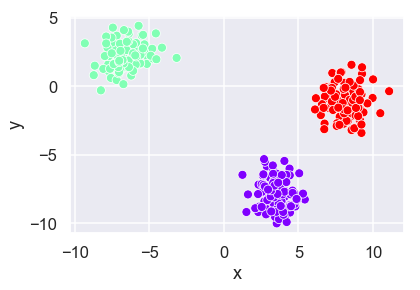

In [3]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

### K-means

In [4]:
def do_kmeans_clustering(k, X, random_state):
    
    np.random.seed(random_state)
    
    data = X.copy()
    c = data.shape[1]
    
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    centers = np.random.randn(k,c)*std + mean
    
    distances = np.zeros((data.shape[0],k))
    centers_new = deepcopy(centers)

    error = 1

    while error != 0:
        for i in range(k):
            distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
        clusters = np.argmin(distances, axis = 1)
        
        centers_old = deepcopy(centers_new)
        for i in range(k):
            centers_new[i] = np.mean(data[clusters == i], axis=0)
        error = np.linalg.norm(centers_new - centers_old)
    return centers_new  


### Treinamento

Realizar treinamento com `k = 3` e `random_state = 30`.

In [5]:
centers_new = do_kmeans_clustering(3, X, 30)

### Plotar grupos resultantes

Utilizar dois métodos: `sns.scatterplot` para os dados e `plt.scatter` para os centróides. Caso tenha dúvidas, revise os exemplos dos notebooks da aula.

In [41]:
def plot_kmeans(centers_new, X, marker='*', random_state=30):
    plt.scatter(X[:,0], X[:,1], s=7, c='b')
    plt.scatter(centers_new[:,0], centers_new[:,1], marker=marker, label="random_state='{0}'".format(random_state), s=150)
    plt.legend(numpoints=1)

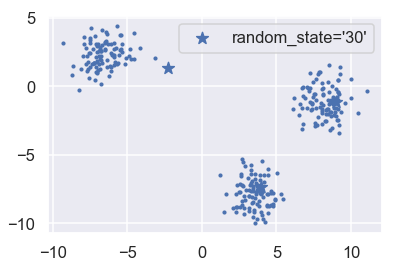

In [42]:
plot_kmeans(centers_new, X)

### Pergunta

Após finalizar a implementação, faça testes com diferentes valores para o `random_state`. O que você pode observar?

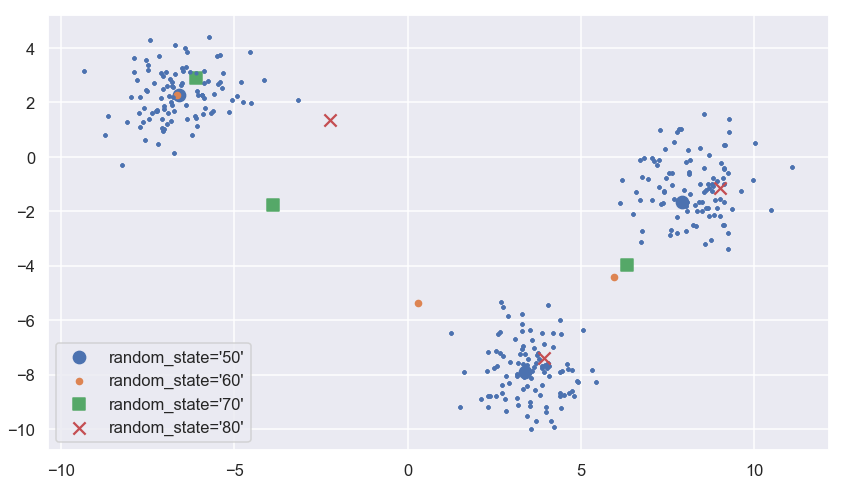

In [46]:
random_states = []
centers_test = []

for i in range(50, 90, 10):
    random_states.append(i)
    centers_test.append(do_kmeans_clustering(3, X, i))
    
marker = 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'

for index, x in enumerate(centers_test):
    plot_kmeans(x, X, marker[index], random_states[index])

<p>É possível notar que o ponto de partida para o Kmeans é muito importante. Neste caso uma melhora no algorítmo tendo diversos pontos de partida e comparando a distancia dos centróides para os grupos seria mais adequado. Garantindo assim então que o centróide mais próximo fosse o escolhido e não o primeiro encontrado como foi demonstrado neste gráfico</p>